In [1]:
import numpy as np, matplotlib.pyplot as plt
from BayesianRegression import BayesianRegression

In [2]:
rnd = np.random.RandomState(0)
X = np.linspace(0, 10, num = 100).reshape(-1, 1)
y = np.sin(X) + 1 + rnd.normal(loc = 0, scale = 0.5, size = X.shape)
X = np.hstack(
    (
        np.ones(X.shape).reshape(-1, 1), 
        X, 
        X**2, 
        X**3, 
        X**4
    )
)

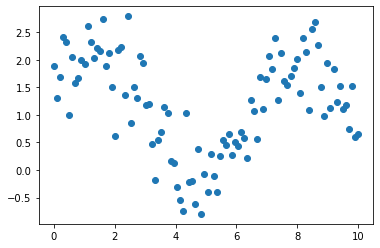

In [3]:
plt.scatter(X[:, 1], y)

In [4]:
regr = BayesianRegression(np.zeros(5).reshape(-1, 1), np.eye(5))
regr.fit(X, y, batch_size = 1, max_iter = 100)

In [5]:
regr.mean

array([[ 1.33701023],
       [ 1.89924509],
       [-1.20070607],
       [ 0.20834092],
       [-0.01084054]])

In [6]:
regr.cov

array([[ 2.20982187e-03, -2.63302295e-03,  9.16040466e-04,
        -1.21461256e-04,  5.43663942e-06],
       [-2.63302295e-03,  4.33005192e-03, -1.71462467e-03,
         2.43940193e-04, -1.14144709e-05],
       [ 9.16040466e-04, -1.71462467e-03,  7.27021519e-04,
        -1.07952262e-04,  5.20170797e-06],
       [-1.21461256e-04,  2.43940193e-04, -1.07952262e-04,
         1.65033720e-05, -8.12260963e-07],
       [ 5.43663942e-06, -1.14144709e-05,  5.20170797e-06,
        -8.12260963e-07,  4.06265631e-08]])

In [7]:
coeffs = rnd.multivariate_normal(regr.mean.flatten(), regr.cov, size = 1000).T
lines = X @ coeffs
lower, upper = np.min(lines, axis = 1), np.max(lines, axis = 1)
means, _ = regr.predict(X)

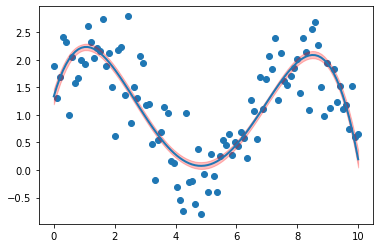

In [8]:
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], means, linewidth = 2)
plt.fill_between(X[:, 1], lower, upper, color = "red", alpha = 0.25)